In [18]:
from gensim.models import LdaModel
import pickle as pkl
import numpy as np
# # import matplotlib.colors as mcolors
from nltk.corpus import stopwords
from wordcloud import WordCloud #, STOPWORDS
from matplotlib import pyplot as plt
# # import matplotlib.colors as mcolors
# # from tqdm import tqdm
# # # import pandas as pd
# # # import matplotlib.pyplot as plt

In [1]:
# Optimal number of topics
nTopics = 21

In [2]:
# Define colors to associate with each topic
custom_colors = {
 'burlywood': '#DEB887',
 'chocolate': '#D2691E',
 'crimson': '#DC143C',
 'darkgreen': '#006400',
 'darkorange': '#FF8C00',
 'darkslategrey': '#2F4F4F',
 'deepskyblue': '#00BFFF',
 'dimgray': '#696969',
 'firebrick': '#B22222',
 'gold': '#FFD700',
 'goldenrod': '#DAA520',
 'lawngreen': '#7CFC00',
 'lightcoral': '#F08080',
 'lightpink': '#FFB6C1',
 'mediumvioletred': '#C71585',
 'orangered': '#FF4500',
 'orchid': '#DA70D6',
 'royalblue': '#4169E1',
 'slateblue': '#6A5ACD',
 'springgreen': '#00FF7F',
 'steelblue': '#4682B4',
 'teal': '#008080',
 'turquoise': '#40E0D0',
 'yellow': '#FFFF00',
 'blueviolet': '#8A2BE2',
 'yellowgreen': '#9ACD32'}

# turn into a list
colorlist = []
for color in custom_colors.values():
    colorlist.append(tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))

# Load Data

In [5]:
# Load model
lda_model = LdaModel.load(f'trained_models/trained_lda_model_final_{nTopics}')

In [ ]:
# load cleaned corpus
# with open('data/cleaned_corpus_final.pkl', 'rb') as f:
#     corpus = pkl.load(f)
# with open("data/id2word_final.pkl", 'rb') as f:
#     id2word= pkl.load(f)

In [8]:
# Load topic distributions
topic_distributions = np.load(f'data/topic_distributions_final_{lda_model.num_topics}.npy')

In [9]:
# load raw corpus dataframe
with open('data/raw_corpus_final.pkl', 'rb') as f:
    corpus_df = pkl.load(f)

# Subjective Topic Naming

In [10]:
# look at top key words
topics = lda_model.show_topics(formatted=False, num_topics=nTopics, num_words=20)
topics

[(0,
  [('system', 0.030244255),
   ('model', 0.025088875),
   ('optimization', 0.018008232),
   ('optimal', 0.01624719),
   ('water', 0.0154508725),
   ('operation', 0.014906143),
   ('network', 0.013743648),
   ('objective', 0.012429085),
   ('cost', 0.0122225005),
   ('propose', 0.011696863),
   ('problem', 0.011351752),
   ('design', 0.011050627),
   ('develop', 0.010480949),
   ('reservoir', 0.0091465935),
   ('performance', 0.008894634),
   ('control', 0.008830159),
   ('management', 0.008741381),
   ('solution', 0.008535223),
   ('decision', 0.008050887),
   ('base', 0.0074579013)]),
 (1,
  [('distribution', 0.02659471),
   ('datum', 0.019309599),
   ('value', 0.019237591),
   ('parameter', 0.016802214),
   ('analysis', 0.015972666),
   ('use', 0.013880074),
   ('spatial', 0.012766138),
   ('correlation', 0.010389079),
   ('scale', 0.010020053),
   ('base', 0.009651876),
   ('rainfall', 0.009090236),
   ('sample', 0.009055635),
   ('index', 0.008784244),
   ('relationship', 0.00

In [11]:
# define topic names
topic_names = ['Reservoir Modeling',
               'Quantitative Methods',
               'Water Quality Monitoring',
               'Water Resource Management',
               'Climate Change',
               'Transport & Tracers',
               'Sediment and Erosion',
               'Land Surface',
               'Hydrogeology',
               'Soil Moisture',
               'Snow Hydrology',
               'Water Quality Remediation',
               'Groundwater',
               'Channel Flow',
               'Vadose Zone',
               'Watershed Hydrology',
               'Modeling',
               '????',
               'Biochemical',
               'Floods',
               'Pollutant runoff'
              ]

# Create WordClouds and Trend Plots

In [12]:
# calculate time series
years = np.unique(corpus_df['Year'])
topic_distributions_by_year = np.zeros([len(years), lda_model.num_topics])
for y, year in enumerate(years):
    hm_year = topic_distributions[corpus_df['Year'] == year,:]
    topic_distributions_by_year[y,:] = np.sum(hm_year, axis=0) / np.sum(hm_year)

In [19]:
# create wordclouds
stop_words = stopwords.words('english')
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3500,
                  height=3500,
                  max_words=15,
                  color_func=lambda *args, **kwargs: colorlist[t],
                  prefer_horizontal=1.0)

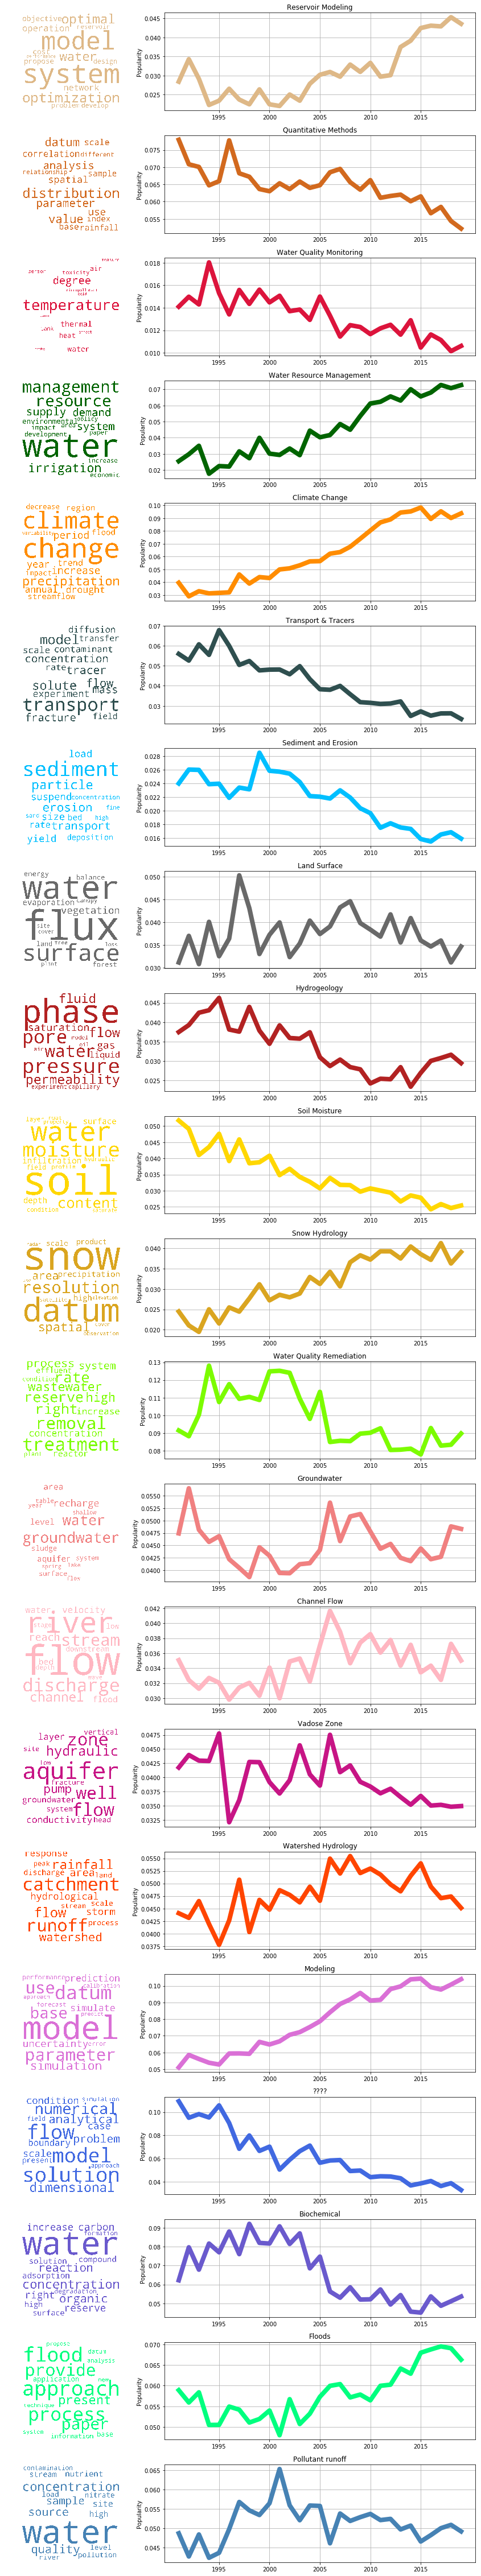

In [20]:
# plot
fig = plt.figure(figsize=(12, 3*nTopics))
gs = fig.add_gridspec(nTopics,3)
for t in range(nTopics):
    
    # plot time series
    ax1 = fig.add_subplot(gs[t, 1:])
    ax1.plot(years, topic_distributions_by_year[:,t], color=list(custom_colors.values())[t], linewidth=8)
    ax1.set_title(topic_names[t])
    ax1.set_xticks(years[4::5])
    ax1.set_ylabel('Popularity')
    ax1.grid()
    
    # plot wordclouds
    ax0 = fig.add_subplot(gs[t, 0])
    topic_words = dict(topics[t][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=1500)
    ax0.imshow(cloud)
    ax0.axis('off')
    
fig.tight_layout()

In [21]:
# plot relative time series
fig = plt.figure(figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
for i in range(lda_model.num_topics):
    r, g, b = tableau20[i]  
    pltcolor = (r / 255., g / 255., b / 255.)
    plt.plot(years, popularity_all_journals[:,i], 
             color = pltcolor, linewidth=3, label=labels[i])
plt.xlim([1,47])
plt.xticks(years[5::5], fontsize=14)
plt.yticks(fontsize=14)
# plt.xlabel('Year of Publication', fontsize=20)
plt.legend()
plt.ylabel('Popularity', fontsize=20)
plt.title('Relative Popularity of Topics', fontsize=28)
plt.grid()
# plt.savefig(f'figures/all_topics_timeseries_{i}.png')
plt.show()

NameError: name 'tableau20' is not defined

<Figure size 800x400 with 0 Axes>